In [1]:
import torch
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
from torchvision import transforms, datasets

C:\Users\user\miniconda3\envs\ml\lib\site-packages\requests\__init__.py:78: RequestsDependencyWarning: urllib3 (1.26.12) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({0}) or chardet ({1}) doesn't match a supported "


In [2]:
if torch.cuda.is_available():
    DEVICE = torch.device('cuda')
else:
    DEVICE = torch.device('cpu')

In [3]:
# 딥러닝 파라메터  설정
BATCH_SIZE = 64
INPUT_SIZE = 1000   # 입력층의 노드개수
HIDDEN_SIZE = 100   # 은닉층의 노드수  (INPUT_SIZE 를 다수의 파라메터를 이용해서 계산할 결과에 한번 더 계산되는 파라메터수)
OUTPUT_SIZE = 10  # 최종 출력노드의 수 (class 개수)

In [4]:

# 데이터셋 만들기
train_dataset =  datasets.MNIST(
    root = './data/MNIST'
    ,train=True
    ,download=True
    ,transform = transforms.ToTensor()
)
test_dataset =  datasets.MNIST(
    root = './data/MNIST'
    ,train=False
    ,download=True
    ,transform = transforms.ToTensor()
)

In [5]:
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=BATCH_SIZE,shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=BATCH_SIZE,shuffle=True)

In [6]:
import matplotlib.pyplot as plt

In [7]:
for x_train,y_train in train_loader:
    break

In [8]:
x_train.shape

torch.Size([64, 1, 28, 28])

In [9]:
x_train[0].shape

torch.Size([1, 28, 28])

In [10]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='TRUE'

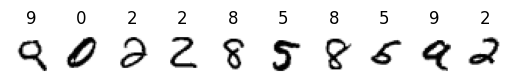

In [13]:
for i in range(10):
    plt.subplot(1,10,i+1)
    plt.imshow(x_train[i,:,:,:].numpy().reshape(28,28),cmap='gray_r')
    plt.title(y_train[i].item())
    plt.axis('off')
plt.show()    

In [38]:
# 모델설계
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(28*28,512)
        self.fc2 = nn.Linear(512,256)
        self.fc3 = nn.Linear(256,10)
    def forward(self, x):
        x = x.view(-1,28*28)
        x = self.fc1(x)
        x = torch.sigmoid(x)
        x = self.fc2(x)
        x = torch.sigmoid(x)
        x = self.fc3(x)
        x = F.log_softmax(x, dim=1)
        return x       
            

In [39]:
# 모델 객체 만들기
model =  Net().to(DEVICE)

In [40]:
model, model.parameters()

(Net(
   (fc1): Linear(in_features=784, out_features=512, bias=True)
   (fc2): Linear(in_features=512, out_features=256, bias=True)
   (fc3): Linear(in_features=256, out_features=10, bias=True)
 ),
 <generator object Module.parameters at 0x0000026AB88E4200>)

In [41]:
# 옵티마이져, 손실함수
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
criterion = nn.CrossEntropyLoss()

In [42]:
# 학습함수
def train(model, train_loader, optimizer, log_interval):
    model.train()
    epoch = 0
    for batch_idx, (image,label) in enumerate(train_loader):
        epoch += 1
        image = image.to(DEVICE)
        label = label.to(DEVICE)
        optimizer.zero_grad()
        output = model(image)
        loss = criterion(output,label)
        loss.backward()
        optimizer.step()
        if batch_idx % log_interval == 0:
            print(f"Train epoch : {epoch} [{batch_idx*len(image)} /{len(train_loader.dataset)} ] \
                  , Train loss : {loss.item()}")

In [ ]:
# evaluate 함수 만들기

In [43]:
for epoch in range(1,11):
    train(model,train_loader,optimizer,100)

Train epoch : 1 [0 /60000 ]                   , Train loss : 2.3546383380889893
Train epoch : 101 [6400 /60000 ]                   , Train loss : 0.3587450683116913
Train epoch : 201 [12800 /60000 ]                   , Train loss : 0.04095350578427315
Train epoch : 301 [19200 /60000 ]                   , Train loss : 0.23416489362716675
Train epoch : 401 [25600 /60000 ]                   , Train loss : 0.3012775182723999
Train epoch : 501 [32000 /60000 ]                   , Train loss : 0.05942797660827637
Train epoch : 601 [38400 /60000 ]                   , Train loss : 0.06898081302642822
Train epoch : 701 [44800 /60000 ]                   , Train loss : 0.12729567289352417
Train epoch : 801 [51200 /60000 ]                   , Train loss : 0.02950691431760788
Train epoch : 901 [57600 /60000 ]                   , Train loss : 0.3007625341415405
Train epoch : 1 [0 /60000 ]                   , Train loss : 0.01402414869517088
Train epoch : 101 [6400 /60000 ]                   , Train l

KeyboardInterrupt: 